In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       

prices=list()
sentiment=list()
for file in files:
    
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector=[]
    meanvector=[]
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalSentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    meanvector=np.concatenate((sentimentVector,pd.rolling_mean(sentimentVector,2)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,4)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,6)),axis=1)
    meanvector=np.concatenate((meanvector,pd.rolling_mean(sentimentVector,8)),axis=1)
    

    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    sentiment.append(meanvector)
    
    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=2,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()
/home/andrea/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=8,center=False).mean()


In [7]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
(2861, 25)
4.39397056076079
Window: 0
[[159 124]
 [164 119]]
F1,score 0.4524714828897338
Accuracy: 0.4911660777385159
1291.5496650148827
Window: 4
[[148 129]
 [167 121]]
F1,score 0.44981412639405205
Accuracy: 0.4761061946902655
372.7593720314938
Window: 5
[[146 136]
 [160 123]]
F1,score 0.45387453874538747
Accuracy: 0.4761061946902655
11.787686347935873
Window: 25
[[152 138]
 [145 126]]
F1,score 0.4710280373831776
Accuracy: 0.49554367201426025
31.622776601683793
Window: 26
[[151 135]
 [155 120]]
F1,score 0.45283018867924524
Accuracy: 0.483065953654189
10000.0
Window: 125
[[145 154]
 [109 133]]
F1,score 0.5028355387523629
Accuracy: 0.5138632162661737
10000.0
Window: 130
[[127 166]
 [101 146]]
F1,score 0.5223613595706618
Accuracy: 0.5055555555555555
10000.0
Window: 250
[[ 69  86]
 [190 171]]
F1,score 0.5533980582524272
Accuracy: 0.46511627906976744
0.005994842503189409
Window: 260
[[ 48 124]
 [ 60 282]]
F1,score 0.7540106951871658
Accuracy: 0.642023346303502
[0, 0, 0, 

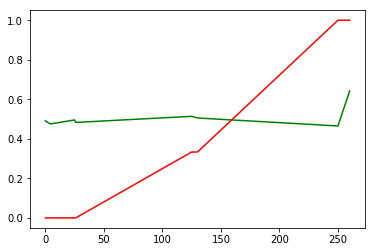

Working on... AMZN
(2718, 25)
2.782559402207126
Window: 0
[[ 92 175]
 [ 90 182]]
F1,score 0.5786963434022258
Accuracy: 0.5083487940630798
166.81005372000558
Window: 4
[[124 116]
 [130 168]]
F1,score 0.5773195876288659
Accuracy: 0.5427509293680297
0.046415888336127774
Window: 5
[[ 38 201]
 [ 41 258]]
F1,score 0.6807387862796833
Accuracy: 0.550185873605948
19.306977288832496
Window: 25
[[ 80 110]
 [138 206]]
F1,score 0.6242424242424242
Accuracy: 0.5355805243445693
372.7593720314938
Window: 26
[[ 92 102]
 [147 193]]
F1,score 0.6078740157480315
Accuracy: 0.5337078651685393
372.7593720314938
Window: 125
[[109  79]
 [130 196]]
F1,score 0.6522462562396006
Accuracy: 0.5933852140077821
1000.0
Window: 130
[[ 99  87]
 [134 193]]
F1,score 0.6359143327841845
Accuracy: 0.5692007797270955
10000.0
Window: 250
[[ 37  91]
 [ 88 273]]
F1,score 0.753103448275862
Accuracy: 0.6339468302658486
10000.0
Window: 260
[[ 26 106]
 [ 95 260]]
F1,score 0.7212205270457698
Accuracy: 0.5872689938398358
[0, 0, 0, 0, 0, 

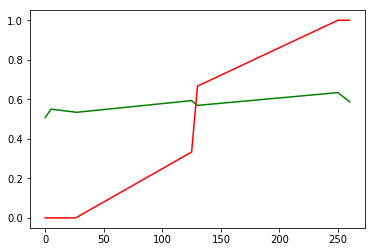

Working on... GOOGL
(3995, 25)
10000.0
Window: 0
[[196 200]
 [209 193]]
F1,score 0.48553459119496856
Accuracy: 0.487468671679198
1000.0
Window: 4
[[203 180]
 [179 235]]
F1,score 0.5669481302774427
Accuracy: 0.5495608531994981
0.005994842503189409
Window: 5
[[ 74 303]
 [113 307]]
F1,score 0.5961165048543688
Accuracy: 0.4780426599749059
227.58459260747887
Window: 25
[[138 235]
 [133 287]]
F1,score 0.6093418259023354
Accuracy: 0.5359394703656999
610.5402296585327
Window: 26
[[137 243]
 [139 274]]
F1,score 0.589247311827957
Accuracy: 0.5182849936948297
1291.5496650148827
Window: 125
[[136 239]
 [137 261]]
F1,score 0.5812917594654788
Accuracy: 0.5135834411384217
166.81005372000558
Window: 130
[[160 217]
 [151 244]]
F1,score 0.5700934579439252
Accuracy: 0.5233160621761658
0.005994842503189409
Window: 250
[[ 85 292]
 [106 265]]
F1,score 0.5711206896551724
Accuracy: 0.4679144385026738
0.0001
Window: 260
[[182 200]
 [207 157]]
F1,score 0.435506241331484
Accuracy: 0.4544235924932976
[0, 0, 0, 0,

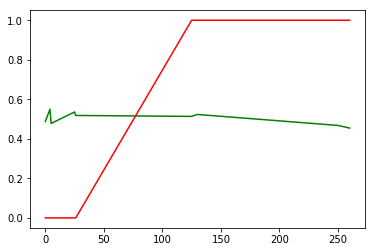

Working on... MSFT
(4576, 25)
0.0001
Window: 0
[[ 87 356]
 [108 358]]
F1,score 0.6067796610169491
Accuracy: 0.48954895489548955
0.000774263682681127
Window: 4
[[ 56 347]
 [103 402]]
F1,score 0.6411483253588517
Accuracy: 0.5044052863436124
0.005994842503189409
Window: 5
[[ 45 358]
 [ 90 415]]
F1,score 0.6494522691705791
Accuracy: 0.5066079295154186
610.5402296585327
Window: 25
[[166 198]
 [251 289]]
F1,score 0.5628042843232716
Accuracy: 0.5033185840707964
10000.0
Window: 26
[[180 177]
 [268 279]]
F1,score 0.5563310069790628
Accuracy: 0.5077433628318584
10000.0
Window: 125
[[139 173]
 [255 317]]
F1,score 0.5969868173258003
Accuracy: 0.5158371040723982
10000.0
Window: 130
[[129 173]
 [220 361]]
F1,score 0.6475336322869956
Accuracy: 0.5549263873159683
10000.0
Window: 250
[[ 71 176]
 [230 382]]
F1,score 0.6529914529914529
Accuracy: 0.5273573923166472
10000.0
Window: 260
[[ 99 165]
 [230 363]]
F1,score 0.647636039250669
Accuracy: 0.5390898483080513
[0, 0, 0, 0, 0, 25, 25, 25, 25]
[0.48954895

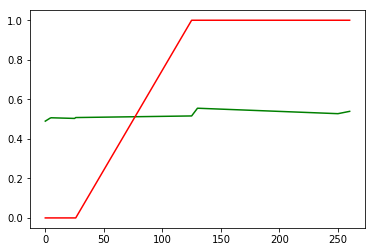

Working on... FB
(4561, 25)
1.0
Window: 0
[[126 312]
 [123 345]]
F1,score 0.6133333333333334
Accuracy: 0.5198675496688742
372.7593720314938
Window: 4
[[212 226]
 [204 263]]
F1,score 0.5502092050209206
Accuracy: 0.5248618784530387
4.39397056076079
Window: 5
[[142 299]
 [157 307]]
F1,score 0.5738317757009346
Accuracy: 0.49613259668508286
166.81005372000558
Window: 25
[[253 177]
 [258 213]]
F1,score 0.49477351916376305
Accuracy: 0.5172031076581576
1.637893706954064
Window: 26
[[283 146]
 [298 174]]
F1,score 0.4393939393939394
Accuracy: 0.5072142064372919
0.000774263682681127
Window: 125
[[362  16]
 [445  58]]
F1,score 0.20103986135181973
Accuracy: 0.4767309875141884
0.3593813663804626
Window: 130
[[305  85]
 [331 159]]
F1,score 0.43324250681198906
Accuracy: 0.5272727272727272
19.306977288832496
Window: 250
[[285 177]
 [209 185]]
F1,score 0.4894179894179894
Accuracy: 0.5490654205607477
51.7947467923121
Window: 260
[[248 220]
 [200 186]]
F1,score 0.4696969696969697
Accuracy: 0.5081967213114

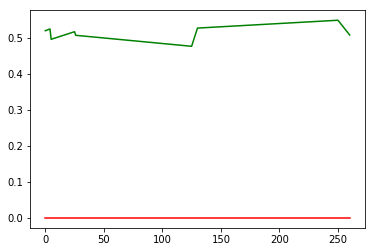

Working on... INTC
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


2.6826957952797255
Window: 0
[[231 211]
 [242 225]]
F1,score 0.4983388704318936
Accuracy: 0.5016501650165016
0.0001
Window: 4
[[322 107]
 [301 178]]
F1,score 0.46596858638743455
Accuracy: 0.5506607929515418
1.0
Window: 5
[[248 166]
 [282 212]]
F1,score 0.48623853211009177
Accuracy: 0.5066079295154186
1000.0
Window: 25
[[122 269]
 [241 272]]
F1,score 0.5161290322580645
Accuracy: 0.4358407079646018
372.7593720314938
Window: 26
[[118 266]
 [259 261]]
F1,score 0.498567335243553
Accuracy: 0.4192477876106195
10000.0
Window: 125
[[ 98 144]
 [219 423]]
F1,score 0.6997518610421836
Accuracy: 0.5893665158371041
10000.0
Window: 130
[[ 91 137]
 [222 433]]
F1,score 0.706938775510204
Accuracy: 0.5934314835787089
0.000774263682681127
Window: 250
[[110 135]
 [215 399]]
F1,score 0.6951219512195123
Accuracy: 0.5925494761350407
0.0001
Window: 260
[[150  96]
 [308 303]]
F1,score 0.6000000000000001
Accuracy: 0.5285880980163361
[0, 0, 0, 0, 0, 0, 0, 75, 75]
[0.5016501650165016, 0.5506607929515418, 0.50660792

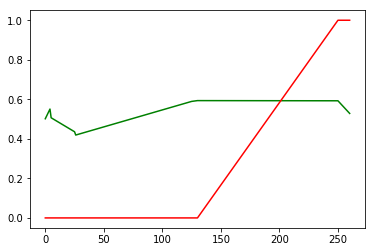

Working on... CSCO
(4575, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


372.7593720314938
Window: 0
[[215 227]
 [217 250]]
F1,score 0.5296610169491526
Accuracy: 0.5115511551155115
0.046415888336127774
Window: 4
[[ 41 390]
 [ 32 445]]
F1,score 0.6783536585365854
Accuracy: 0.5352422907488987
0.3593813663804626
Window: 5
[[126 296]
 [144 342]]
F1,score 0.608540925266904
Accuracy: 0.5154185022026432
1291.5496650148827
Window: 25
[[162 273]
 [172 297]]
F1,score 0.5717035611164581
Accuracy: 0.5077433628318584
10000.0
Window: 26
[[145 287]
 [163 309]]
F1,score 0.5786516853932584
Accuracy: 0.5022123893805309
0.3593813663804626
Window: 125
[[ 87 261]
 [134 402]]
F1,score 0.6705587989991658
Accuracy: 0.5531674208144797
1.0
Window: 130
[[126 210]
 [185 362]]
F1,score 0.6470062555853441
Accuracy: 0.5526613816534541
10000.0
Window: 250
[[ 60 191]
 [147 461]]
F1,score 0.7317460317460318
Accuracy: 0.6065192083818394
10000.0
Window: 260
[[ 68 182]
 [119 488]]
F1,score 0.764291307752545
Accuracy: 0.6487747957992999
[0, 0, 0, 0, 0, 0, 0, 75, 75]
[0.5115511551155115, 0.53524

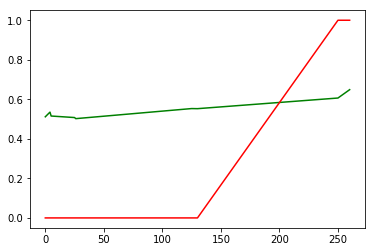

Working on... CMCSA
(4569, 25)
0.0001
Window: 0
[[359  75]
 [403  72]]
F1,score 0.2315112540192926
Accuracy: 0.47414741474147415
10000.0
Window: 4
[[179 261]
 [196 272]]
F1,score 0.5434565434565436
Accuracy: 0.4966960352422907
10000.0
Window: 5
[[165 268]
 [205 270]]
F1,score 0.5330700888450147
Accuracy: 0.4790748898678414
1.637893706954064
Window: 25
[[435  40]
 [371  58]]
F1,score 0.22011385199240988
Accuracy: 0.5453539823008849
1.0
Window: 26
[[439  39]
 [369  57]]
F1,score 0.21839080459770113
Accuracy: 0.5486725663716814
1.637893706954064
Window: 125
[[367 197]
 [166 154]]
F1,score 0.45901639344262296
Accuracy: 0.5893665158371041
1000.0
Window: 130
[[295 266]
 [157 165]]
F1,score 0.43824701195219123
Accuracy: 0.5209513023782559
4.39397056076079
Window: 250
[[202 356]
 [ 71 230]]
F1,score 0.5186020293122887
Accuracy: 0.5029103608847497
610.5402296585327
Window: 260
[[249 319]
 [ 91 198]]
F1,score 0.4913151364764268
Accuracy: 0.5215869311551925
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.47414741

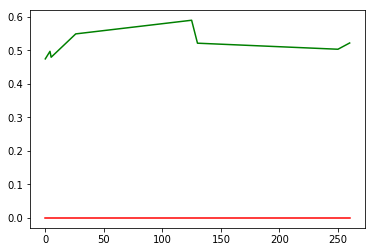

Working on... NVDA
(4576, 25)
2.6826957952797255
Window: 0
[[188 271]
 [180 270]]
F1,score 0.544904137235116
Accuracy: 0.5038503850385039
227.58459260747887
Window: 4
[[219 209]
 [230 250]]
F1,score 0.5324813631522897
Accuracy: 0.5165198237885462
610.5402296585327
Window: 5
[[218 218]
 [233 239]]
F1,score 0.5145317545748116
Accuracy: 0.5033039647577092
610.5402296585327
Window: 25
[[168 182]
 [268 286]]
F1,score 0.5596868884540118
Accuracy: 0.5022123893805309
610.5402296585327
Window: 26
[[151 208]
 [273 272]]
F1,score 0.5307317073170732
Accuracy: 0.46792035398230086
166.81005372000558
Window: 125
[[153 216]
 [212 303]]
F1,score 0.5860735009671181
Accuracy: 0.5158371040723982
610.5402296585327
Window: 130
[[146 218]
 [212 307]]
F1,score 0.5881226053639848
Accuracy: 0.5130237825594564
1000.0
Window: 250
[[123 201]
 [244 291]]
F1,score 0.566699123661149
Accuracy: 0.4819557625145518
1291.5496650148827
Window: 260
[[114 208]
 [278 257]]
F1,score 0.514
Accuracy: 0.4329054842473746
[0, 0, 0,

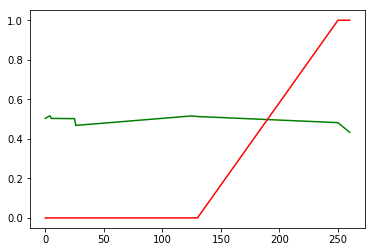

Working on... NFLX
(4575, 25)
227.58459260747887
Window: 0
[[253 184]
 [276 196]]
F1,score 0.46009389671361506
Accuracy: 0.49394939493949397
1291.5496650148827
Window: 4
[[148 246]
 [231 283]]
F1,score 0.5426653883029723
Accuracy: 0.4746696035242291
166.81005372000558
Window: 5
[[105 288]
 [189 326]]
F1,score 0.5775022143489814
Accuracy: 0.4746696035242291
51.7947467923121
Window: 25
[[156 183]
 [253 312]]
F1,score 0.5886792452830188
Accuracy: 0.5176991150442478
0.0001
Window: 26
[[217 124]
 [341 222]]
F1,score 0.4884488448844884
Accuracy: 0.4856194690265487
10000.0
Window: 125
[[111 123]
 [299 351]]
F1,score 0.6245551601423487
Accuracy: 0.5226244343891403
10000.0
Window: 130
[[111 127]
 [285 360]]
F1,score 0.6360424028268551
Accuracy: 0.5334088335220838
0.0001
Window: 250
[[ 34 109]
 [295 421]]
F1,score 0.6757624398073837
Accuracy: 0.529685681024447
0.0001
Window: 260
[[ 37  99]
 [268 453]]
F1,score 0.7117046347211312
Accuracy: 0.5717619603267211
[0, 0, 0, 0, 0, 25, 25, 25, 25]
[0.493

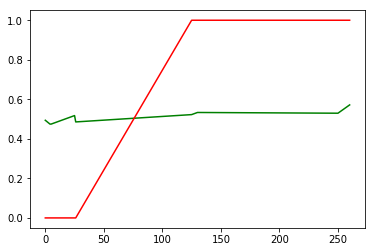

Working on... ADBE
(4574, 25)
4.39397056076079
Window: 0
[[245 174]
 [286 204]]
F1,score 0.4700460829493087
Accuracy: 0.49394939493949397
610.5402296585327
Window: 4
[[143 283]
 [210 272]]
F1,score 0.5245901639344261
Accuracy: 0.45704845814977973
84.83428982440716
Window: 5
[[145 277]
 [201 285]]
F1,score 0.5438931297709924
Accuracy: 0.473568281938326
0.005994842503189409
Window: 25
[[ 45 354]
 [110 395]]
F1,score 0.6299840510366826
Accuracy: 0.48672566371681414
0.000774263682681127
Window: 26
[[ 64 341]
 [141 358]]
F1,score 0.5976627712854757
Accuracy: 0.4668141592920354
1291.5496650148827
Window: 125
[[148 150]
 [358 228]]
F1,score 0.4730290456431535
Accuracy: 0.4253393665158371
10000.0
Window: 130
[[107 179]
 [342 255]]
F1,score 0.4946653734238603
Accuracy: 0.4099660249150623
84.83428982440716
Window: 250
[[145  82]
 [226 406]]
F1,score 0.725
Accuracy: 0.6414435389988359
610.5402296585327
Window: 260
[[147  78]
 [289 343]]
F1,score 0.6514719848053182
Accuracy: 0.5717619603267211
[0,

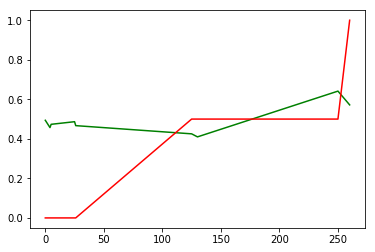

Working on... AMGN
(4573, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


138.94954943731375
Window: 0
[[163 291]
 [179 276]]
F1,score 0.5401174168297457
Accuracy: 0.4829482948294829
166.81005372000558
Window: 4
[[165 257]
 [221 265]]
F1,score 0.5257936507936507
Accuracy: 0.473568281938326
227.58459260747887
Window: 5
[[185 232]
 [230 261]]
F1,score 0.5304878048780488
Accuracy: 0.4911894273127753
10000.0
Window: 25
[[211 217]
 [215 261]]
F1,score 0.5471698113207547
Accuracy: 0.5221238938053098
138.94954943731375
Window: 26
[[236 192]
 [229 246]]
F1,score 0.538882803943045
Accuracy: 0.5337763012181617
0.3593813663804626
Window: 125
[[264  78]
 [285 257]]
F1,score 0.5860889395667047
Accuracy: 0.5893665158371041
1.0
Window: 130
[[275  71]
 [273 264]]
F1,score 0.6055045871559633
Accuracy: 0.6104190260475651
138.94954943731375
Window: 250
[[268  77]
 [263 251]]
F1,score 0.5961995249406176
Accuracy: 0.6041909196740396
166.81005372000558
Window: 260
[[261  78]
 [320 198]]
F1,score 0.4987405541561713
Accuracy: 0.5355892648774796
[0, 0, 0, 0, 0, 0, 0, 25, 25]
[0.4829

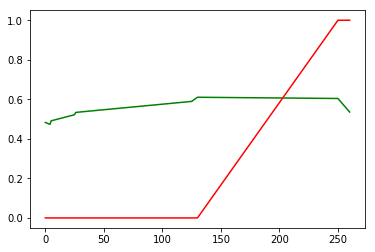

Working on... TXN
(4544, 25)
84.83428982440716
Window: 0
[[259 183]
 [263 198]]
F1,score 0.47030878859857483
Accuracy: 0.5060908084163898
10000.0
Window: 4
[[242 185]
 [290 186]]
F1,score 0.4391971664698937
Accuracy: 0.4739756367663344
1291.5496650148827
Window: 5
[[260 163]
 [267 212]]
F1,score 0.49648711943793916
Accuracy: 0.5232815964523282
1291.5496650148827
Window: 25
[[232 194]
 [291 181]]
F1,score 0.42739079102715466
Accuracy: 0.4599109131403118
0.000774263682681127
Window: 26
[[334  88]
 [447  29]]
F1,score 0.09780775716694771
Accuracy: 0.4042316258351893
31.622776601683793
Window: 125
[[267 189]
 [ 66 356]]
F1,score 0.736297828335057
Accuracy: 0.7095671981776766
166.81005372000558
Window: 130
[[218 236]
 [ 77 346]]
F1,score 0.6885572139303483
Accuracy: 0.6431014823261118
0.005994842503189409
Window: 250
[[217 200]
 [228 208]]
F1,score 0.4928909952606635
Accuracy: 0.49824150058616645
0.005994842503189409
Window: 260
[[226 200]
 [204 221]]
F1,score 0.5224586288416075
Accuracy: 0

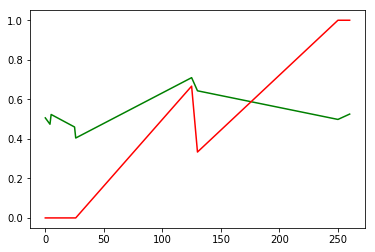

Working on... AVGO
(4575, 25)
1000.0
Window: 0
[[161 284]
 [149 315]]
F1,score 0.5926622765757291
Accuracy: 0.5236523652365237
610.5402296585327
Window: 4
[[185 278]
 [160 285]]
F1,score 0.5654761904761905
Accuracy: 0.5176211453744494
227.58459260747887
Window: 5
[[205 253]
 [180 270]]
F1,score 0.5549845837615621
Accuracy: 0.5231277533039648
227.58459260747887
Window: 25
[[286 178]
 [231 209]]
F1,score 0.5054413542926239
Accuracy: 0.547566371681416
166.81005372000558
Window: 26
[[299 169]
 [230 206]]
F1,score 0.5080147965474722
Accuracy: 0.5586283185840708
10000.0
Window: 125
[[232 304]
 [194 154]]
F1,score 0.38213399503722084
Accuracy: 0.43665158371040724
10000.0
Window: 130
[[241 305]
 [215 122]]
F1,score 0.3193717277486911
Accuracy: 0.4110985277463194
1291.5496650148827
Window: 250
[[248 324]
 [191  96]]
F1,score 0.2715700141442716
Accuracy: 0.40046565774155995
138.94954943731375
Window: 260
[[354 200]
 [224  79]]
F1,score 0.27147766323024053
Accuracy: 0.5052508751458576
[0, 0, 0, 0

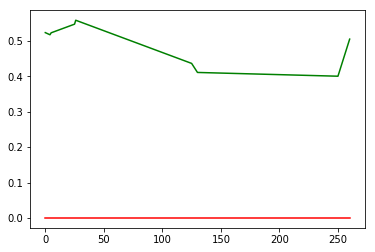

Working on... PYPL
(4551, 25)
2.6826957952797255
Window: 0
[[226 210]
 [259 214]]
F1,score 0.4771460423634337
Accuracy: 0.48404840484048406
10000.0
Window: 4
[[183 243]
 [246 236]]
F1,score 0.4911550468262227
Accuracy: 0.46145374449339205
0.005994842503189409
Window: 5
[[ 32 372]
 [ 24 480]]
F1,score 0.7079646017699116
Accuracy: 0.5638766519823789
227.58459260747887
Window: 25
[[175 220]
 [294 215]]
F1,score 0.4555084745762712
Accuracy: 0.4314159292035398
1000.0
Window: 26
[[168 216]
 [257 263]]
F1,score 0.5265265265265265
Accuracy: 0.47676991150442477
31.622776601683793
Window: 125
[[124 220]
 [276 264]]
F1,score 0.515625
Accuracy: 0.43891402714932126
7.196856730011519
Window: 130
[[135 210]
 [280 258]]
F1,score 0.5129224652087475
Accuracy: 0.4450736126840317
1000.0
Window: 250
[[118 200]
 [230 311]]
F1,score 0.591254752851711
Accuracy: 0.49941792782305006
1291.5496650148827
Window: 260
[[116 204]
 [249 288]]
F1,score 0.5597667638483964
Accuracy: 0.47141190198366395
[0, 0, 0, 0, 0, 0,

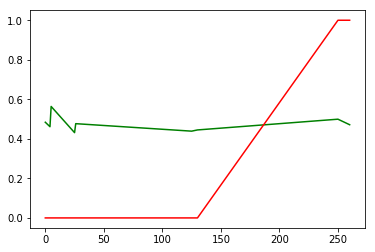

Working on... GILD
(4553, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


610.5402296585327
Window: 0
[[173 285]
 [155 296]]
F1,score 0.5736434108527132
Accuracy: 0.5159515951595159
4.39397056076079
Window: 4
[[225 241]
 [169 273]]
F1,score 0.5711297071129707
Accuracy: 0.5484581497797357
0.0001
Window: 5
[[ 92 384]
 [ 64 368]]
F1,score 0.6216216216216216
Accuracy: 0.5066079295154186
0.046415888336127774
Window: 25
[[158 365]
 [121 260]]
F1,score 0.5168986083499006
Accuracy: 0.46238938053097345
0.000774263682681127
Window: 26
[[135 393]
 [ 98 278]]
F1,score 0.5310410697230181
Accuracy: 0.45685840707964603
0.046415888336127774
Window: 125
[[130 324]
 [ 90 340]]
F1,score 0.6215722120658136
Accuracy: 0.5316742081447964
51.7947467923121
Window: 130
[[204 254]
 [188 237]]
F1,score 0.517467248908297
Accuracy: 0.49943374858437145
1000.0
Window: 250
[[290 104]
 [216 249]]
F1,score 0.6088019559902201
Accuracy: 0.6274738067520372
21.54434690031882
Window: 260
[[200 205]
 [324 128]]
F1,score 0.3261146496815287
Accuracy: 0.38273045507584597
[0, 0, 0, 0, 0, 0, 0, 50, 50]


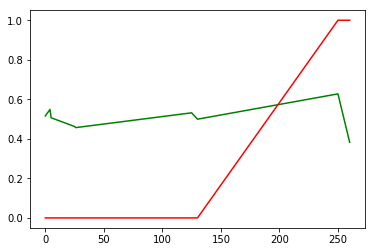

Working on... COST
(4575, 25)
10000.0
Window: 0
[[262 176]
 [267 204]]
F1,score 0.4794359576968273
Accuracy: 0.5126512651265126
1291.5496650148827
Window: 4
[[147 281]
 [180 300]]
F1,score 0.5655042412818096
Accuracy: 0.4922907488986784
227.58459260747887
Window: 5
[[122 308]
 [154 324]]
F1,score 0.5837837837837838
Accuracy: 0.4911894273127753
31.622776601683793
Window: 25
[[185 264]
 [194 261]]
F1,score 0.5326530612244899
Accuracy: 0.49336283185840707
31.622776601683793
Window: 26
[[209 244]
 [223 228]]
F1,score 0.49404117009750814
Accuracy: 0.4834070796460177
31.622776601683793
Window: 125
[[279  90]
 [369 146]]
F1,score 0.38881491344873503
Accuracy: 0.4807692307692308
19.306977288832496
Window: 130
[[260  86]
 [405 132]]
F1,score 0.3496688741721854
Accuracy: 0.44394110985277463
0.005994842503189409
Window: 250
[[239  77]
 [378 165]]
F1,score 0.42038216560509556
Accuracy: 0.470314318975553
227.58459260747887
Window: 260
[[155 163]
 [284 255]]
F1,score 0.5329153605015674
Accuracy: 0.4

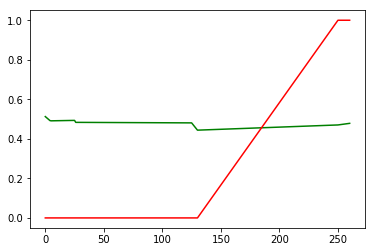

Working on... QCOM
(4576, 25)


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


2.6826957952797255
Window: 0
[[216 222]
 [241 230]]
F1,score 0.4983748645720477
Accuracy: 0.49064906490649063
227.58459260747887
Window: 4
[[214 243]
 [206 245]]
F1,score 0.5218317358892439
Accuracy: 0.5055066079295154
2.6826957952797255
Window: 5
[[296 163]
 [283 166]]
F1,score 0.4267352185089974
Accuracy: 0.5088105726872246
19.306977288832496
Window: 25
[[283 253]
 [216 152]]
F1,score 0.3932729624838292
Accuracy: 0.4811946902654867
19.306977288832496
Window: 26
[[274 266]
 [199 165]]
F1,score 0.41509433962264153
Accuracy: 0.4856194690265487
0.0001
Window: 125
[[442  52]
 [278 112]]
F1,score 0.4043321299638989
Accuracy: 0.6266968325791855
0.046415888336127774
Window: 130
[[422  59]
 [277 125]]
F1,score 0.42662116040955633
Accuracy: 0.6194790486976217
1291.5496650148827
Window: 250
[[308 204]
 [156 191]]
F1,score 0.5148247978436657
Accuracy: 0.580908032596042
0.005994842503189409
Window: 260
[[289 240]
 [102 226]]
F1,score 0.5692695214105793
Accuracy: 0.6009334889148191
[0, 0, 0, 0, 0,

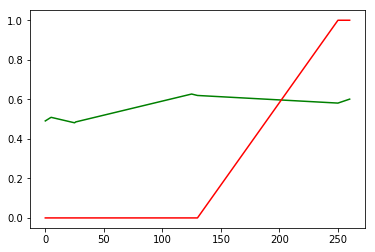

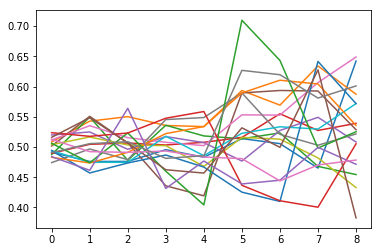

In [9]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    
    senttemp=sentiment[o]
    print(senttemp.shape)
    xtemp=price
    o+=1
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    senttemp=np.nan_to_num(np.asarray(senttemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,4,5,25,26,125,130,250,260]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(senttemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        CM = f1_score(y_test, prediction)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [23]:
tempacc=accstocksresults

[0.49952721 0.50563314 0.50376677 0.49895137 0.49109968 0.53459672
 0.52645894 0.5377487  0.52810973]


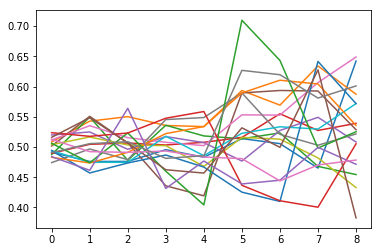

In [24]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()

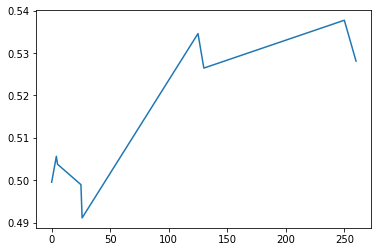

In [25]:
plt.plot(trendwindowtime,t/len(tempacc))
plt.show()